Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
location. Perform following tasks: 1. Pre-process the dataset.
2. Identify outliers. 3. Check the correlation. 4. Implement linear regression and 
ridge, Lasso regression models. 5. Evaluate the models and compare their respective 
scores like R2, RMSE, etc. Dataset link: 
https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('uber.csv')  
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [21]:

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek

data = data.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(columns=['fare_amount'])
y = data_imputed['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,2


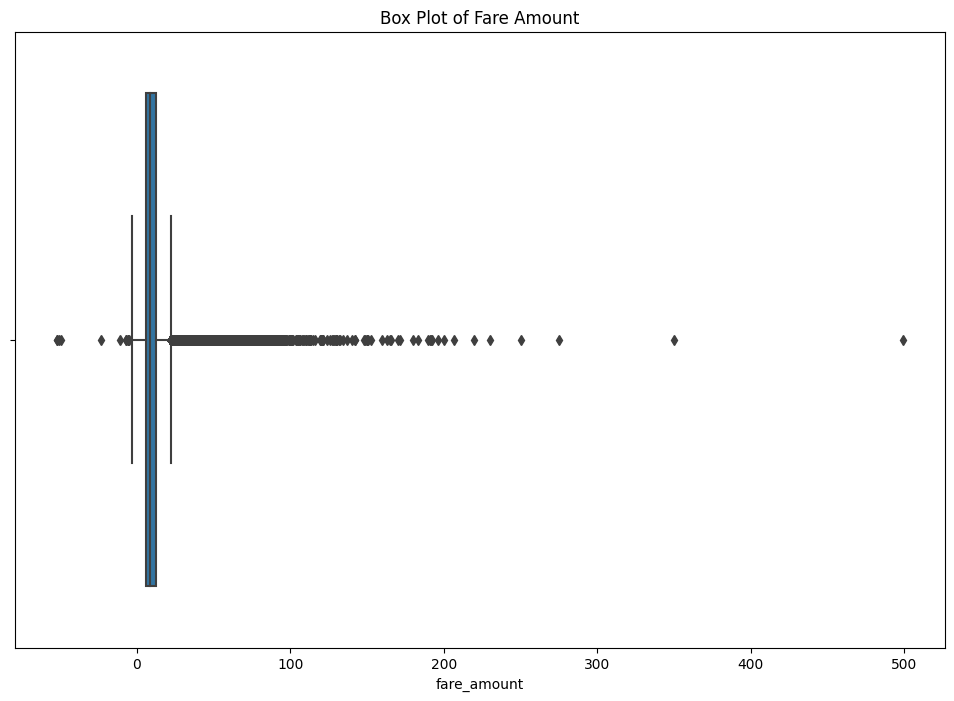

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='fare_amount')
plt.title('Box Plot of Fare Amount')
plt.show()

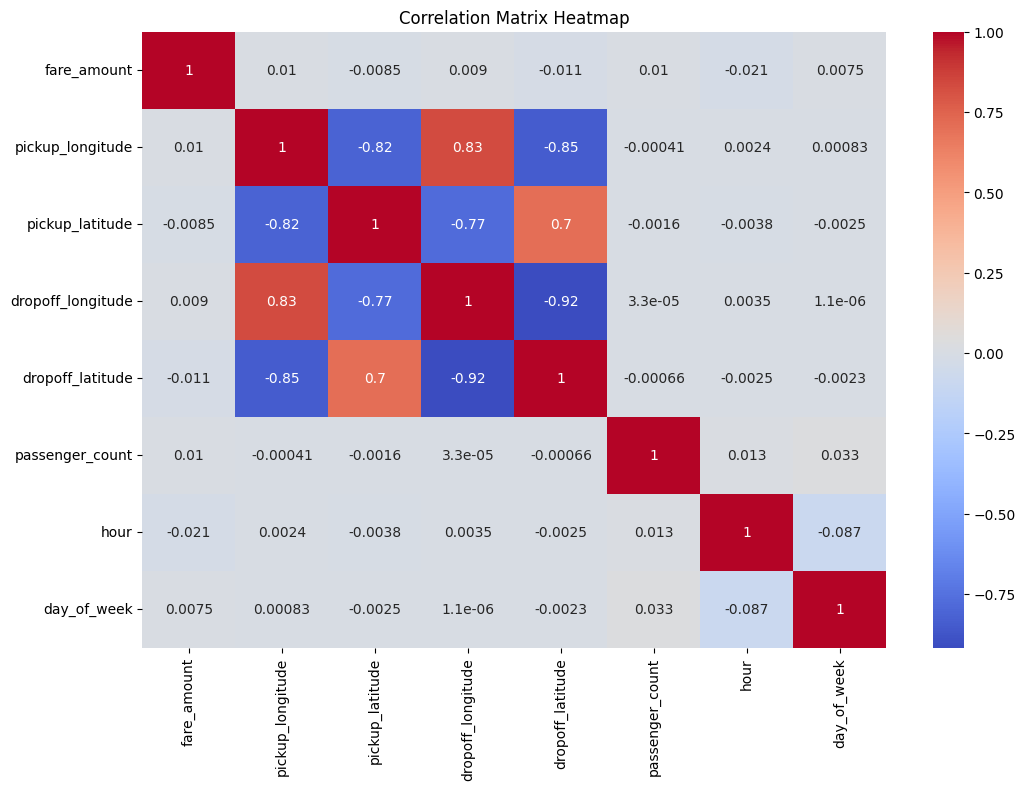

In [16]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print results
print("Linear Regression - R2:", r2_lr*1000, "RMSE:", rmse_lr)
print("Ridge Regression - R2:", r2_ridge*1000, "RMSE:", rmse_ridge)
print("Lasso Regression - R2:", r2_lasso*1000, "RMSE:", rmse_lasso)

Linear Regression - R2: 0.7463283549304922 RMSE: 10.307359776695948
Ridge Regression - R2: 0.7463398803480015 RMSE: 10.307359717253272
Lasso Regression - R2: -0.01683808098018602 RMSE: 10.311295078556256
